In [1]:
# 元コード（Qiita: 【Pytorch】MNISTのGAN（敵対的生成ネットワーク）を実装する）
# https://qiita.com/gensal/items/4be65d9b36fac02f877e#%E7%92%B0%E5%A2%83
# リファクタリング, コードの変更してます
# メニューのランタイムから、「ランタイムのタイプを変更」で、GPUを選択しましょう

In [2]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST

In [3]:
# 学習データの読み込み
BATCH_SIZE = 32

train_data = MNIST(
    "./data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

train_loader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

print("train data size: ",len(train_data))
print("train iteration number: ",len(train_data)//BATCH_SIZE)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 10936993.28it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 354131.66it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3262916.30it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5070675.74it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

train data size:  60000
train iteration number:  1875


images_size: torch.Size([32, 1, 28, 28])
label: tensor([6, 4, 8, 0, 1, 2, 4, 7, 7, 6, 6, 4, 6, 2, 6, 3, 5, 0, 3, 8, 2, 4, 9, 1,
        7, 1, 9, 0, 3, 4, 9, 5])


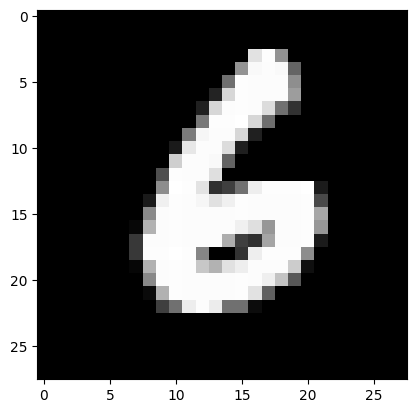

In [4]:
# 最初の画像を表示してみる
images, labels = next(iter(train_loader))
print("images_size:", images.size())
print("label:", labels)

image_numpy = images.detach().numpy().copy()
plt.imshow(image_numpy[0,0,:,:], cmap='gray')

<Figure size 640x480 with 0 Axes>

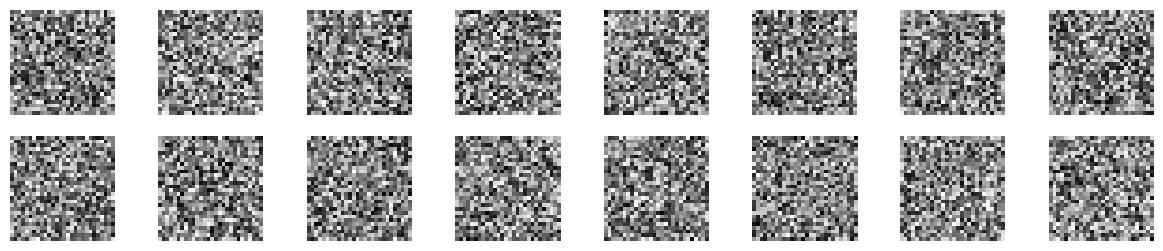

epoch:01, index:0001/1875  train_loss_D:0.04338623  train_loss_G:0.02026732
epoch:01, index:0626/1875  train_loss_D:0.03934166  train_loss_G:0.02224966
epoch:01, index:1251/1875  train_loss_D:0.04392284  train_loss_G:0.02210732


<Figure size 640x480 with 0 Axes>

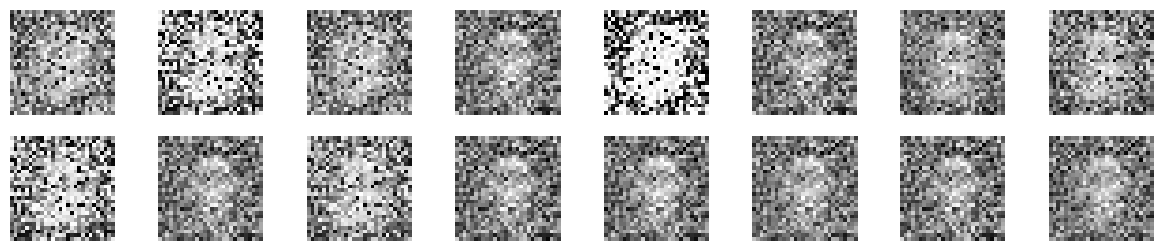

epoch:02, index:0001/1875  train_loss_D:0.04370076  train_loss_G:0.02178833
epoch:02, index:0626/1875  train_loss_D:0.04344423  train_loss_G:0.02163539
epoch:02, index:1251/1875  train_loss_D:0.04340348  train_loss_G:0.02165884


<Figure size 640x480 with 0 Axes>

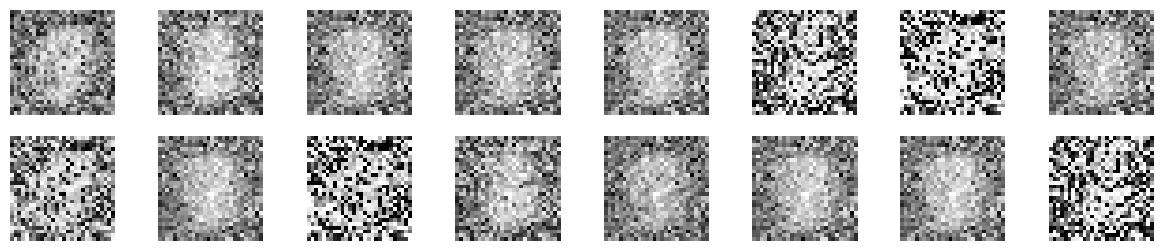

epoch:03, index:0001/1875  train_loss_D:0.04327437  train_loss_G:0.02134921
epoch:03, index:0626/1875  train_loss_D:0.04320899  train_loss_G:0.02197324
epoch:03, index:1251/1875  train_loss_D:0.04343637  train_loss_G:0.02162711


<Figure size 640x480 with 0 Axes>

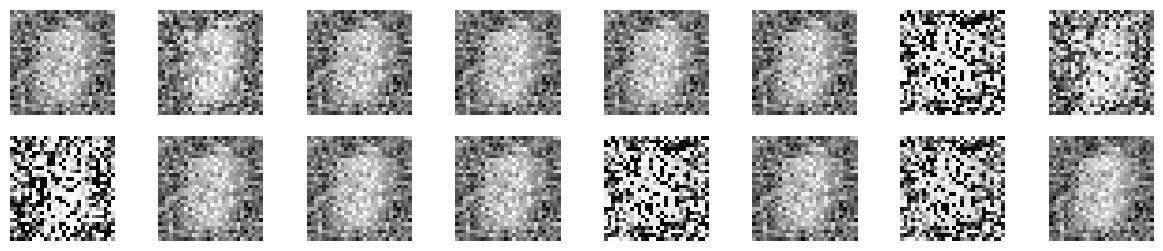

epoch:04, index:0001/1875  train_loss_D:0.04332381  train_loss_G:0.02155622
epoch:04, index:0626/1875  train_loss_D:0.04333878  train_loss_G:0.02146649
epoch:04, index:1251/1875  train_loss_D:0.04340257  train_loss_G:0.02153650


<Figure size 640x480 with 0 Axes>

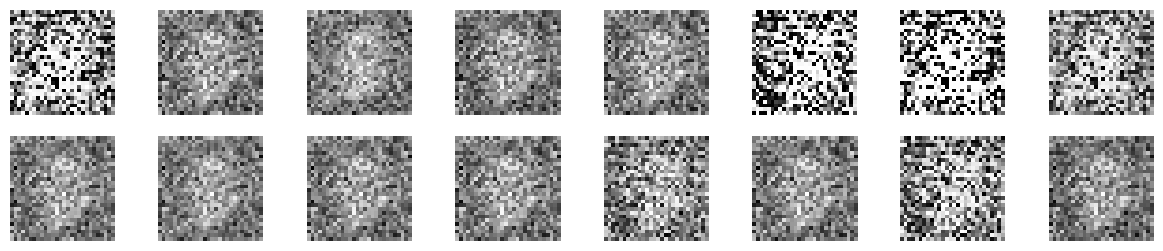

epoch:05, index:0001/1875  train_loss_D:0.04337347  train_loss_G:0.02155590
epoch:05, index:0626/1875  train_loss_D:0.04328397  train_loss_G:0.02156336
epoch:05, index:1251/1875  train_loss_D:0.04332142  train_loss_G:0.02164058


<Figure size 640x480 with 0 Axes>

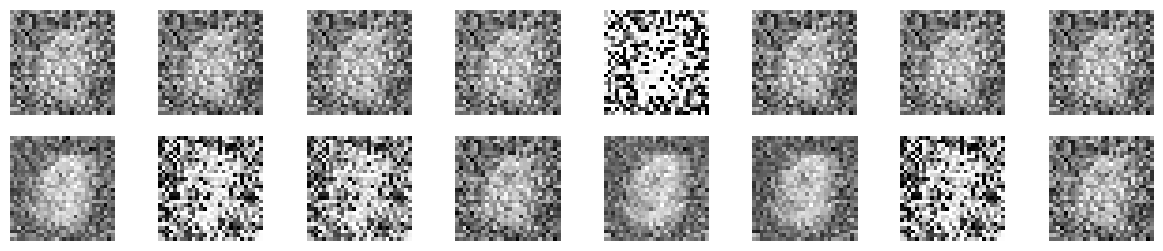

epoch:06, index:0001/1875  train_loss_D:0.04331255  train_loss_G:0.02174519
epoch:06, index:0626/1875  train_loss_D:0.04335532  train_loss_G:0.02155278
epoch:06, index:1251/1875  train_loss_D:0.04332661  train_loss_G:0.02156871


<Figure size 640x480 with 0 Axes>

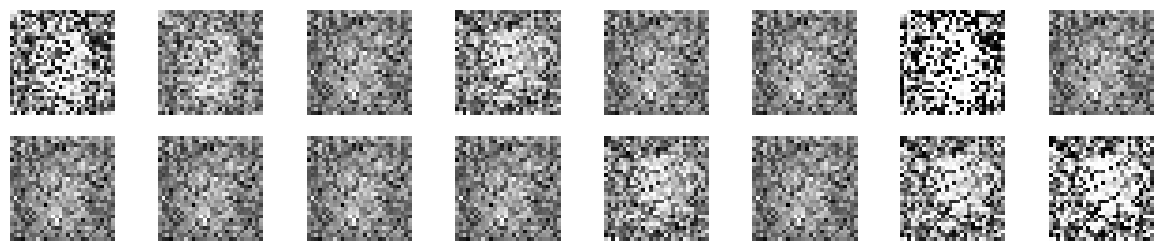

epoch:07, index:0001/1875  train_loss_D:0.04333682  train_loss_G:0.02158956
epoch:07, index:0626/1875  train_loss_D:0.04330638  train_loss_G:0.02162262
epoch:07, index:1251/1875  train_loss_D:0.04332808  train_loss_G:0.02163815


<Figure size 640x480 with 0 Axes>

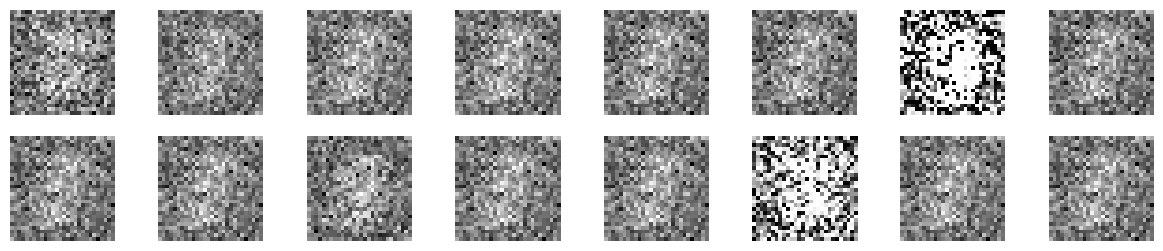

epoch:08, index:0001/1875  train_loss_D:0.04336767  train_loss_G:0.02170610
epoch:08, index:0626/1875  train_loss_D:0.04332069  train_loss_G:0.02171099
epoch:08, index:1251/1875  train_loss_D:0.04332544  train_loss_G:0.02173656


<Figure size 640x480 with 0 Axes>

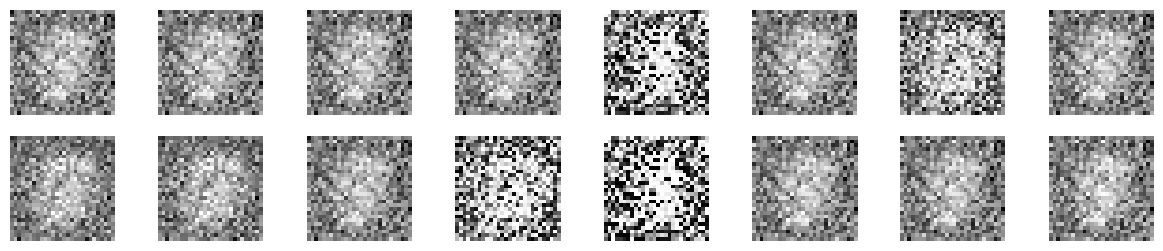

epoch:09, index:0001/1875  train_loss_D:0.04336052  train_loss_G:0.02158079
epoch:09, index:0626/1875  train_loss_D:0.04332157  train_loss_G:0.02166444
epoch:09, index:1251/1875  train_loss_D:0.04332791  train_loss_G:0.02162769


<Figure size 640x480 with 0 Axes>

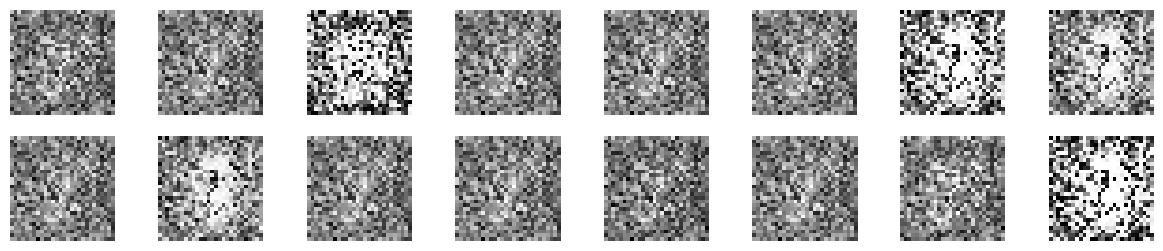

epoch:10, index:0001/1875  train_loss_D:0.04333225  train_loss_G:0.02168732
epoch:10, index:0626/1875  train_loss_D:0.04331792  train_loss_G:0.02160883
epoch:10, index:1251/1875  train_loss_D:0.04330157  train_loss_G:0.02168011


<Figure size 640x480 with 0 Axes>

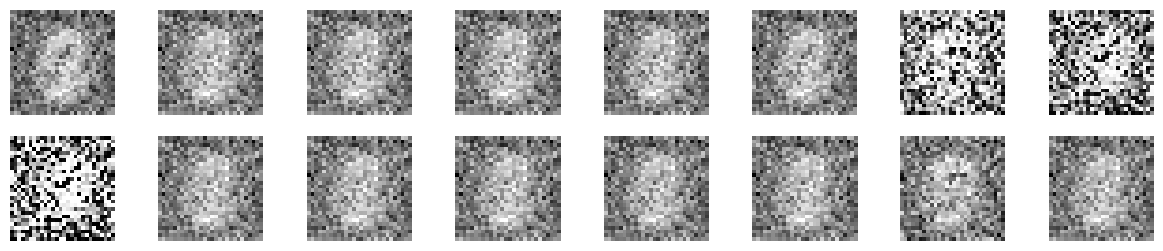

epoch:11, index:0001/1875  train_loss_D:0.04333895  train_loss_G:0.02163690
epoch:11, index:0626/1875  train_loss_D:0.04332848  train_loss_G:0.02170941
epoch:11, index:1251/1875  train_loss_D:0.04332459  train_loss_G:0.02161840


<Figure size 640x480 with 0 Axes>

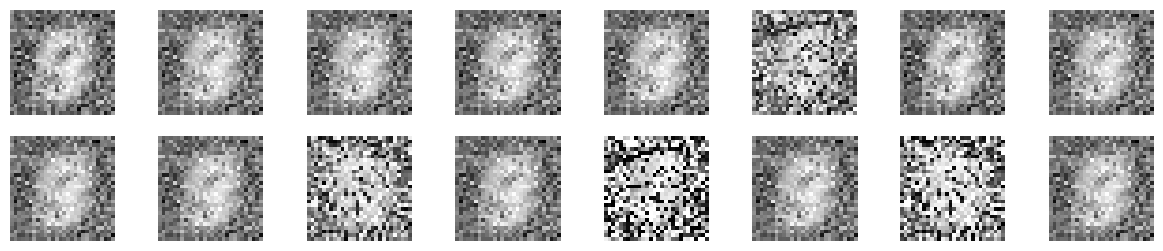

epoch:12, index:0001/1875  train_loss_D:0.04331049  train_loss_G:0.02168370
epoch:12, index:0626/1875  train_loss_D:0.04333526  train_loss_G:0.02168533
epoch:12, index:1251/1875  train_loss_D:0.04330342  train_loss_G:0.02165494


<Figure size 640x480 with 0 Axes>

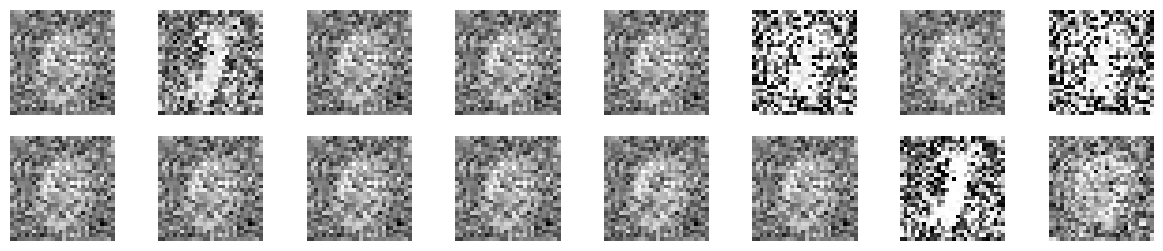

epoch:13, index:0001/1875  train_loss_D:0.04332387  train_loss_G:0.02165592
epoch:13, index:0626/1875  train_loss_D:0.04332238  train_loss_G:0.02165469
epoch:13, index:1251/1875  train_loss_D:0.04331985  train_loss_G:0.02168511


<Figure size 640x480 with 0 Axes>

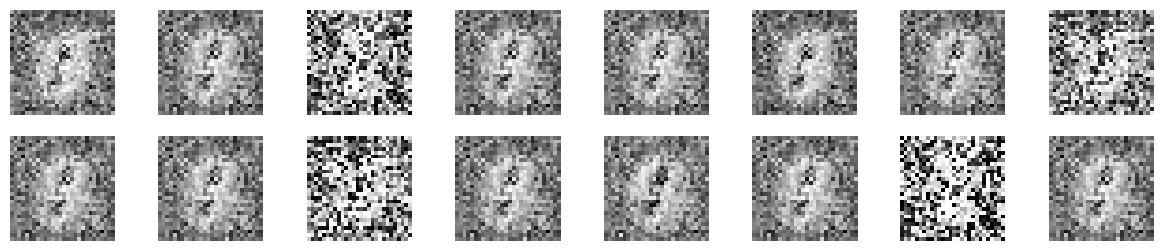

epoch:14, index:0001/1875  train_loss_D:0.04333095  train_loss_G:0.02166717
epoch:14, index:0626/1875  train_loss_D:0.04332099  train_loss_G:0.02163807
epoch:14, index:1251/1875  train_loss_D:0.04332817  train_loss_G:0.02165680


<Figure size 640x480 with 0 Axes>

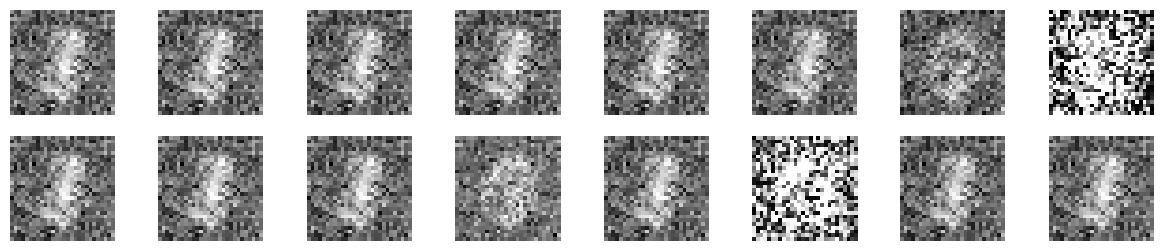

epoch:15, index:0001/1875  train_loss_D:0.04333197  train_loss_G:0.02164574
epoch:15, index:0626/1875  train_loss_D:0.04332902  train_loss_G:0.02167718
epoch:15, index:1251/1875  train_loss_D:0.04332121  train_loss_G:0.02166866


<Figure size 640x480 with 0 Axes>

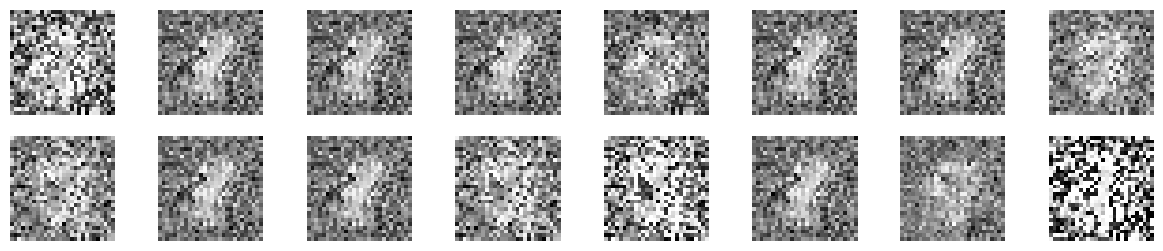

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_D = nn.Sequential(
    nn.Linear(28*28, 512),
    nn.LeakyReLU(0.2, inplace=True),
    nn.Dropout(0.15),
    nn.Linear(512, 256),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Linear(256, 256),
    nn.LeakyReLU(0.2, inplace=True),
    nn.Dropout(0.15),
    nn.Linear(256, 128),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Linear(128, 64),
    nn.LeakyReLU(0.2, inplace=True),
    nn.Dropout(0.15),
    nn.Linear(64, 32),
    nn.LeakyReLU(0.2, inplace=True),
    nn.Linear(32, 1),

    nn.Sigmoid()
).to(device)

z_dim = 32
model_G = nn.Sequential(
    nn.Linear(z_dim, 256),
    nn.ReLU(inplace=True),
    nn.BatchNorm1d(256),

    nn.Linear(256, 512),
    nn.ReLU(inplace=True),
    nn.BatchNorm1d(512),

    nn.Linear(512, 512),
    nn.ReLU(inplace=True),
    nn.BatchNorm1d(512),

    nn.Linear(512, 1024),
    nn.ReLU(inplace=True),
    nn.BatchNorm1d(1024),

    nn.Linear(1024, 28*28),
    nn.Tanh()
).to(device)

one_labels = torch.ones(BATCH_SIZE, 1).to(device)
zero_labels = torch.zeros(BATCH_SIZE, 1).to(device)

criterion = nn.BCELoss()

optimizer_D = optim.Adam(model_D.parameters(), lr=0.00001)
optimizer_G = optim.Adam(model_G.parameters(), lr=0.00001)

epoch_num = 15
G_train_ratio = 3 # 1epochで生成器が学習する回数

def show_image(epoch="0"):
    global model_G
    with torch.no_grad():
        batch_size = 16
        noise = torch.randn((batch_size, z_dim)).to(device)
        syn_image = model_G(noise).to("cpu")
        syn_image = syn_image.view(batch_size, 1, 28, 28).detach().numpy().copy()

        plt.figure()
        fig, ax = plt.subplots(2, batch_size // 2, figsize=(15, 3))
        for i in range(batch_size // 2):
            ax[0, i].imshow(syn_image[i, 0, :, :], cmap='gray')
            ax[1, i].imshow(syn_image[i + batch_size // 2, 0, :, :], cmap='gray')
            ax[0, i].axis("off")
            ax[1, i].axis("off")
        plt.show()
show_image()

history = {"train_loss_D": [], "train_loss_G": []}
for epoch in range(epoch_num):
    model_D.train()
    model_G.train()
    for i, data in enumerate(train_loader):
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1).to(device)

        # 識別器の学習 - 本物のデータ
        optimizer_D.zero_grad()
        outputs = model_D(inputs)
        loss_real = criterion(outputs, one_labels)

        # 識別器の学習 - 偽物のデータ
        noise = torch.randn((BATCH_SIZE, z_dim)).to(device)
        inputs_fake = model_G(noise)
        outputs_fake = model_D(inputs_fake.detach())
        loss_fake = criterion(outputs_fake, zero_labels[:inputs.size(0)])
        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # 生成器の学習
        for _ in range(G_train_ratio):
            optimizer_G.zero_grad()
            noise = torch.randn((BATCH_SIZE, z_dim)).to(device)
            inputs_fake = model_G(noise)
            outputs_fake = model_D(inputs_fake)
            loss_G = criterion(outputs_fake, one_labels[:inputs_fake.size(0)])
            loss_G.backward()
            optimizer_G.step()

        # 学習経過の保存
        train_loss_D = loss_D.item() / BATCH_SIZE
        train_loss_G = loss_G.item() / BATCH_SIZE
        history["train_loss_D"].append(train_loss_D)
        history["train_loss_G"].append(train_loss_G)

        # 学習経過の保存
        if i % (len(train_data) / BATCH_SIZE / 6) == 0:
            print(f"epoch:{epoch+1:02d}, index:{i+1:04d}/{int(len(train_data)/BATCH_SIZE)}  train_loss_D:{train_loss_D:.8f}  train_loss_G:{train_loss_G:.8f}")

    # エポックごとに画像を表示させる
    show_image(epoch)

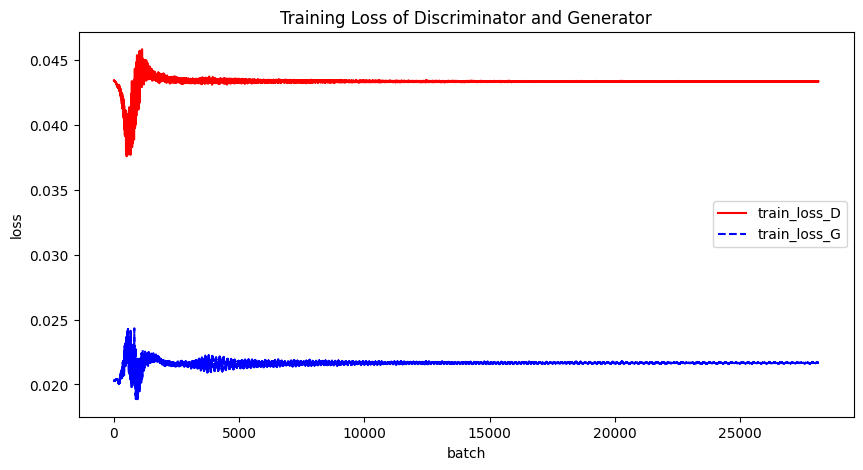

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(history["train_loss_D"], label='train_loss_D', color='red', linestyle='-')
plt.plot(history["train_loss_G"], label='train_loss_G', color='blue', linestyle='--')

plt.xlabel('batch')
plt.ylabel('loss')
plt.title('Training Loss of Discriminator and Generator')
plt.legend()

plt.show()